In [1]:
# set up matplotlib
%matplotlib widget
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams.update({"font.size": 14})

In [2]:
import numpy as np
from xbout import open_boutdataset
from boutdata import collect

In [3]:
case = "2" # 4 and 9  have n,t,p data
filepath = "test" + str(case) + "/BOUT.dmp.0.nc"
#filepath = "test" + str(case) + "/BOUT.dmp.0.nc"

ds = open_boutdataset(datapath="test" + str(case) + "/BOUT.dmp.*.nc", chunks={"t": 4})

# Use squeeze() to get rid of the y-dimension, which has length 1 as blob2d does not
# simulate the parallel dimension.
ds = ds.squeeze(drop=True)

Read in:
<xbout.BoutDataset>
Contains:
<xarray.Dataset> Size: 26MB
Dimensions:             (x: 132, y: 1, z: 132, t: 166)
Coordinates:
    dx                  (x, y, z) float64 139kB dask.array<chunksize=(132, 1, 132), meta=np.ndarray>
    dy                  (x, y, z) float64 139kB dask.array<chunksize=(132, 1, 132), meta=np.ndarray>
    dz                  (x, y, z) float64 139kB dask.array<chunksize=(132, 1, 132), meta=np.ndarray>
  * t                   (t) float64 1kB 0.0 1e-05 2e-05 ... 0.00164 0.00165
  * x                   (x) int64 1kB 0 1 2 3 4 5 6 ... 126 127 128 129 130 131
  * y                   (y) float64 8B 0.1963
  * z                   (z) float64 1kB 0.003788 0.01136 ... 0.9886 0.9962
Data variables: (12/44)
    Bxy                 (x, y, z) float64 139kB dask.array<chunksize=(132, 1, 132), meta=np.ndarray>
    G1                  (x, y, z) float64 139kB dask.array<chunksize=(132, 1, 132), meta=np.ndarray>
    G2                  (x, y, z) float64 139kB dask.array<

/home/tirkas1/miniconda3/lib/python3.13/site-packages/xbout/load.py:646: UserWarning: The specified chunks separate the stored chunks along dimension "t" starting at index 4. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(
/home/tirkas1/miniconda3/lib/python3.13/site-packages/xbout/load.py:341: UserWarning: No geometry type found, no physical coordinates will be added
  warn("No geometry type found, no physical coordinates will be added")


In [4]:
dx = ds["dx"].isel(z=0).values

# Get rid of existing "x" coordinate, which is just the index values.
#ds = ds.drop("x")

# Create a new coordinate, which is length in units of rho_s
ds = ds.assign_coords(x=np.arange(ds.sizes["x"])*dx)

In [5]:
ds_initial = ds.isel(t=0)

In [6]:
for key,val in ds_initial.items():
    print(key)

Bxy
G1
G2
G3
J
Nh+
R
Z
cvode_last_order
cvode_last_step
cvode_nfevals
cvode_nliters
cvode_nniters
cvode_nonlin_fails
cvode_npevals
cvode_nsteps
cvode_num_fails
cvode_stab_lims
g11
g12
g13
g22
g23
g33
g_11
g_12
g_13
g_22
g_23
g_33
iteration
t_array
ncalls
ncalls_e
ncalls_i
wall_time
wtime
wtime_comms
wtime_invert
wtime_io
wtime_per_rhs
wtime_per_rhs_e
wtime_per_rhs_i
wtime_rhs


In [7]:
ds["ddt(Nh+)"][:,2:-2,:].bout.animate2D(aspect="equal")

KeyError: "No variable named 'ddt(Nh+)'. Variables on the dataset include ['Bxy', 'G1', 'G2', 'G3', 'J', ..., 'wtime_per_rhs_i', 'wtime_rhs', 't', 'z', 'x']"

In [ ]:
ds["SNh+"][:,2:-2,:].bout.animate2D(aspect="equal")

Nh+ data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


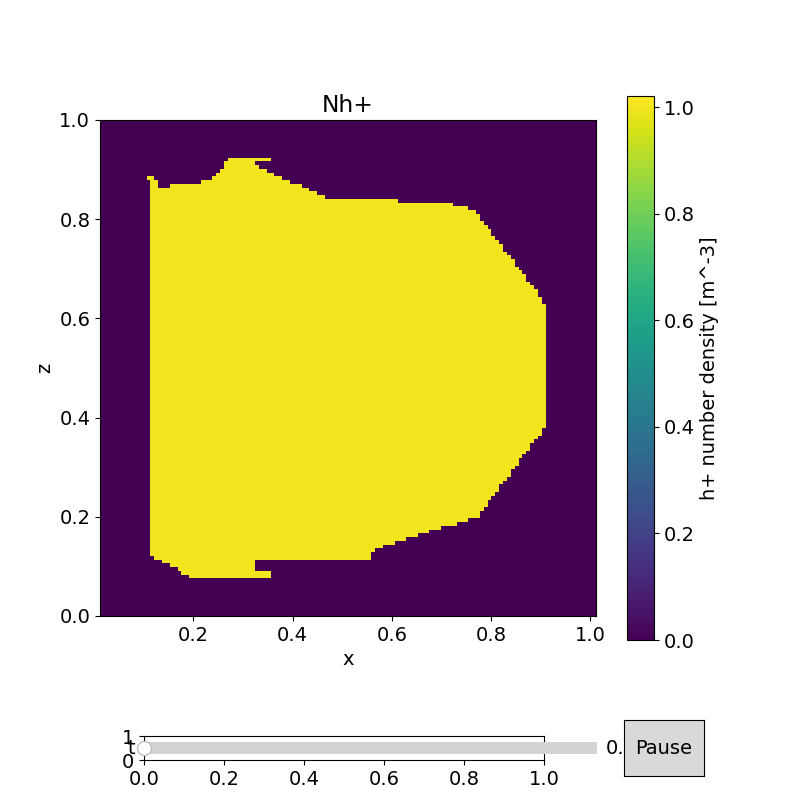

In [8]:
dens = ds["Nh+"][:,2:-2,:]
dens = dens.clip(min=0)
dens.bout.animate2D(aspect="equal")